In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("CAR DETAILS.csv")
df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [39]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
###Handling Nullvalue

In [3]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [4]:
nv=df.isnull().sum()
nv=nv[nv>0]
nv

Series([], dtype: int64)

# Handling duplicates value

In [5]:
df.duplicated().sum()

763

In [6]:
df.drop_duplicates(inplace= True)

In [7]:
df.duplicated().sum()

0

In [ ]:
### Checking Data types

In [8]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [ ]:
###Select Numerical and categorical feature

In [4]:
num_cols=df.dtypes[df.dtypes!=object].index
cat_cols=df.dtypes[df.dtypes==object].index
print(num_cols)
print(cat_cols)

Index(['year', 'selling_price', 'km_driven'], dtype='object')
Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [ ]:
### EDA

In [5]:
for i in cat_cols:
    print(f"Feature {i} | Unique Count {df[i].nunique()}")

Feature name | Unique Count 1491
Feature fuel | Unique Count 5
Feature seller_type | Unique Count 3
Feature transmission | Unique Count 2
Feature owner | Unique Count 5


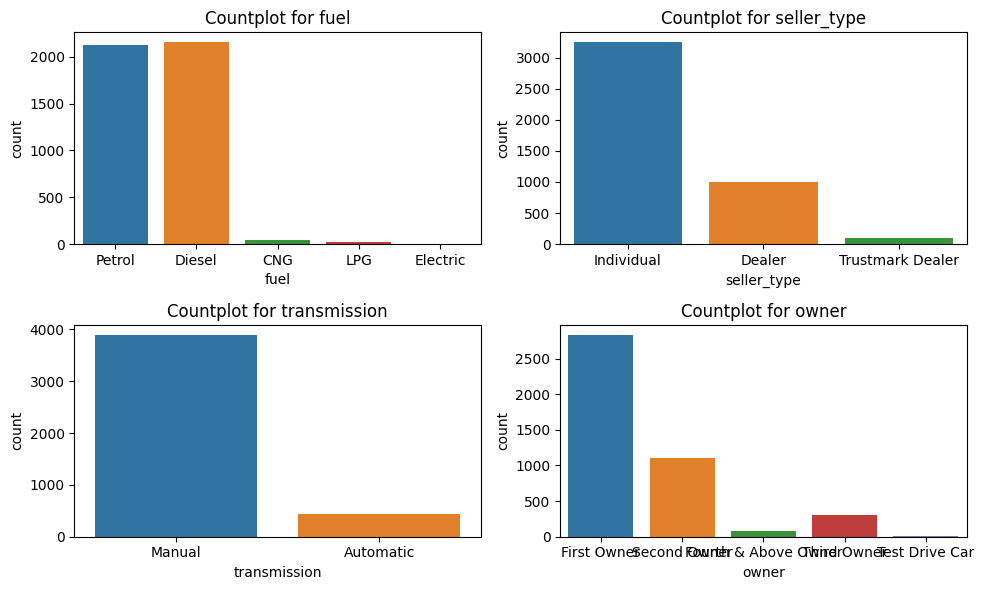

In [6]:
cols=['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(10,6))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f"Countplot for {cols[i]}")
plt.tight_layout()
plt.show()

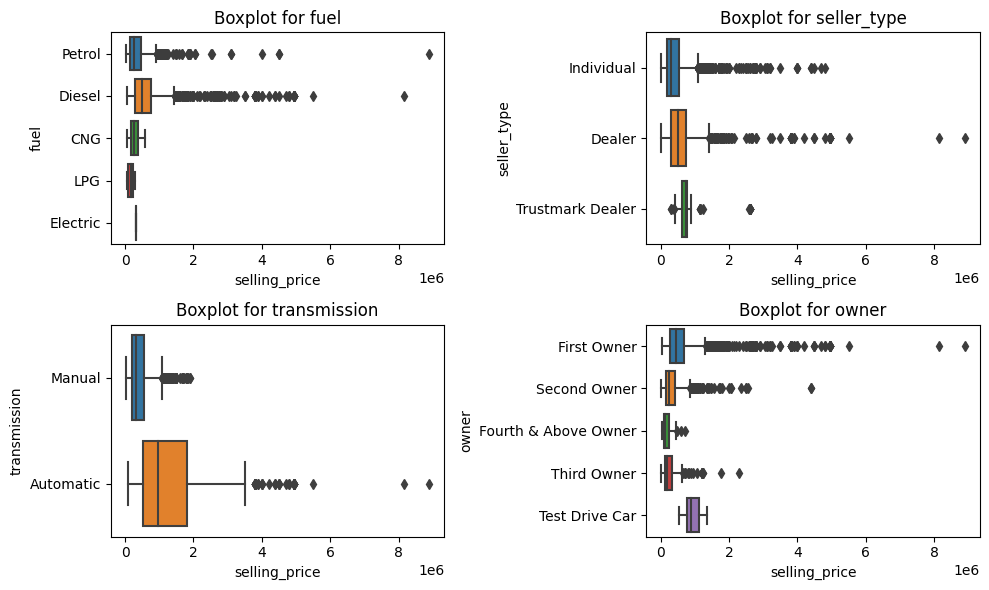

In [7]:
cols=['fuel', 'seller_type', 'transmission', 'owner']
plt.figure(figsize=(10,6))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[cols[i]],x=df['selling_price'])
    plt.title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

In [8]:
for i in num_cols:
    print(f"Feature {i} | Unique Count {df[i].nunique()}")

Feature year | Unique Count 27
Feature selling_price | Unique Count 445
Feature km_driven | Unique Count 770


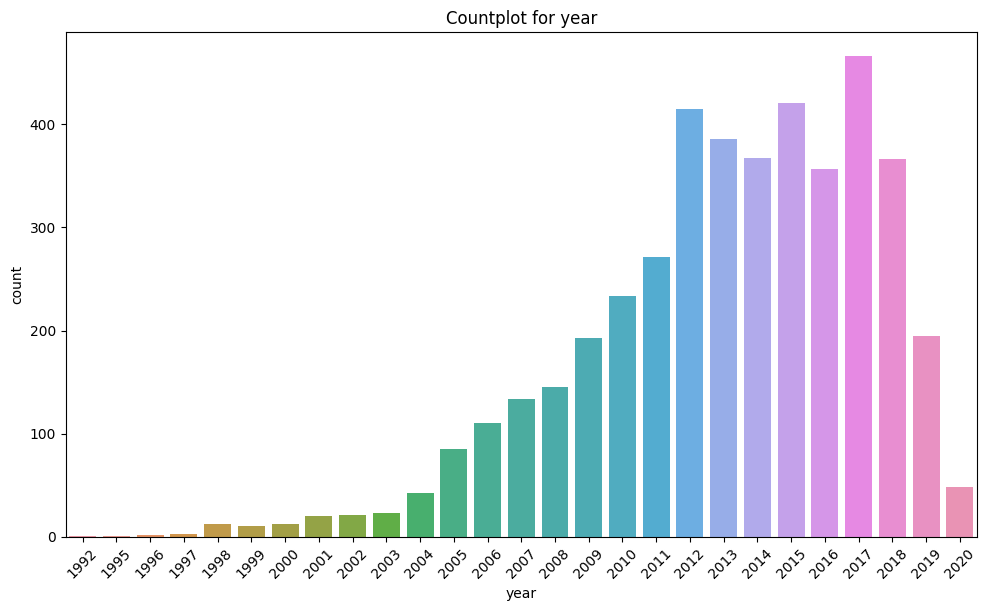

In [9]:
cols=['year']
plt.figure(figsize=(10,6))
for i in range(len(cols)):
    plt.subplot(1,1,i+1)
    sns.countplot(x=df[cols[i]])
    plt.title(f"Countplot for {cols[i]}")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

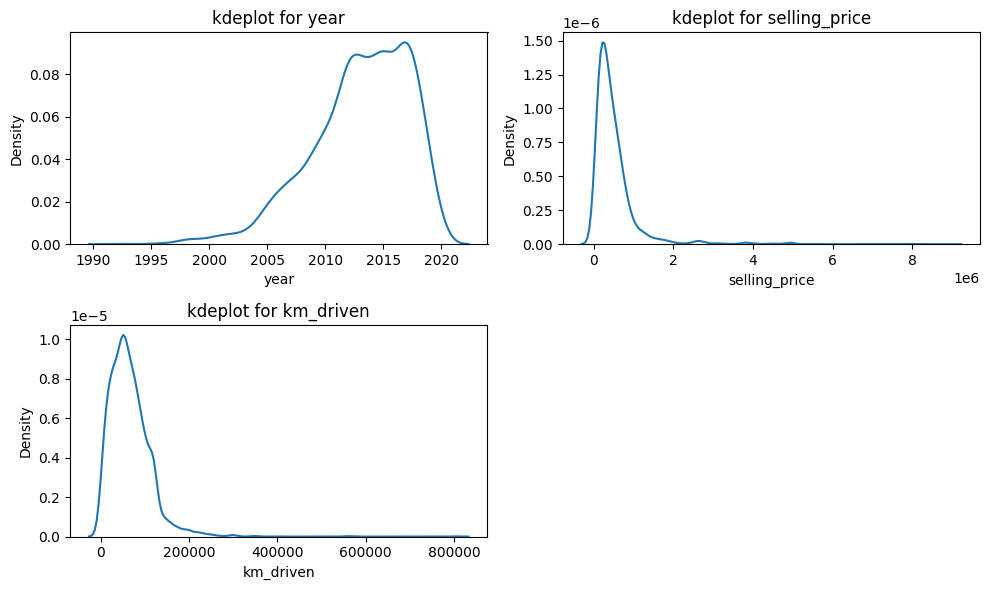

In [10]:
cols=['year', 'selling_price', 'km_driven']
plt.figure(figsize=(10,6))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.kdeplot(x=df[cols[i]])
    plt.title(f"kdeplot for {cols[i]}")
plt.tight_layout()
plt.show()

In [ ]:
### Correation

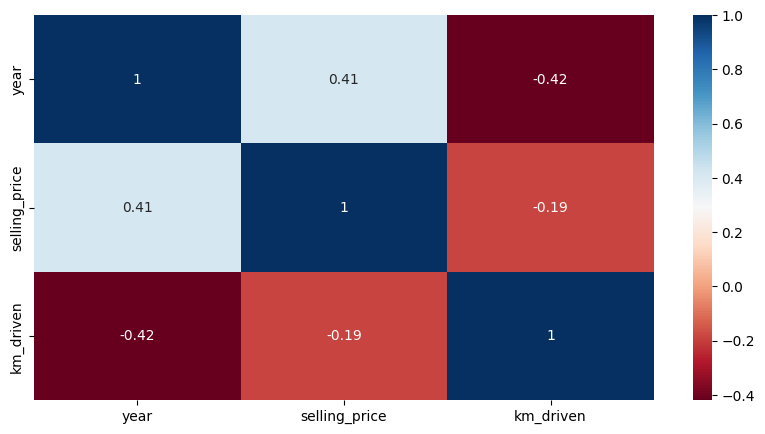

In [11]:
corr=df[num_cols].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

In [38]:
### Outlier Treatment

In [12]:
a =df[num_cols].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T
a=a.iloc[:,3:]
a

,min,1%,2%,5%,50%,95%,98%,99%,max
year,1992.0,2001.00,2003.0,2005.0,2014.0,2019.0,2019.0,2020.0,2020.0
selling_price,20000.0,55000.00,65000.0,80000.0,350000.0,1300000.0,2492200.0,3200000.0,8900000.0
km_driven,1.0,1444.68,5000.0,10000.0,60000.0,140000.0,186000.0,220000.0,806599.0


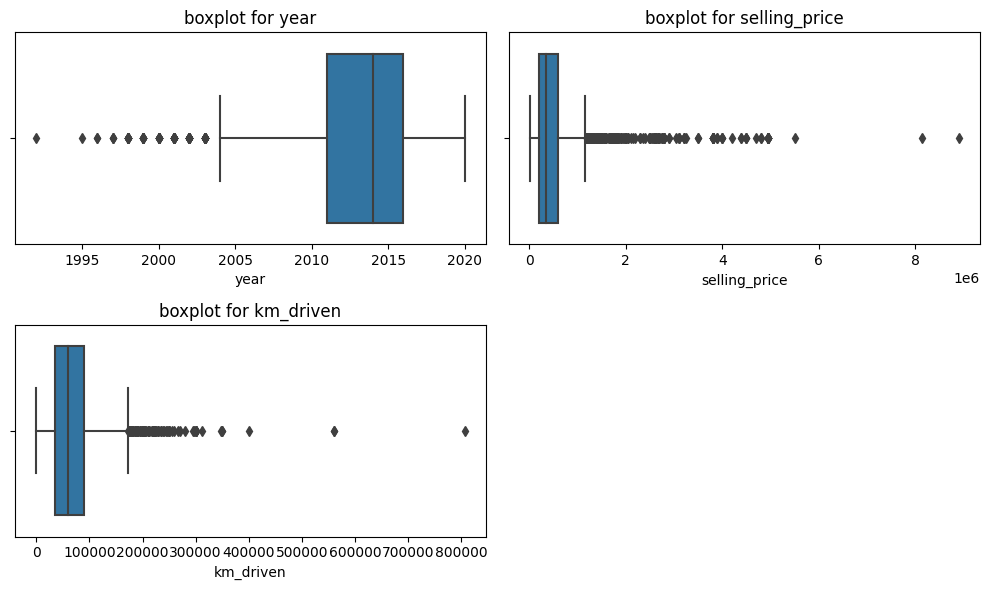

In [13]:
cols=['year', 'selling_price', 'km_driven']
plt.figure(figsize=(10,6))
for i in range(len(cols)):
    
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f"boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

In [14]:
df['year']=np.where(df['year']<2000,2000,df['year'])
df['selling_price']=np.where(df['selling_price']>1300000,1300000,df['selling_price'])
df['km_driven']=np.where(df['km_driven']>200000,200000,df['km_driven'])

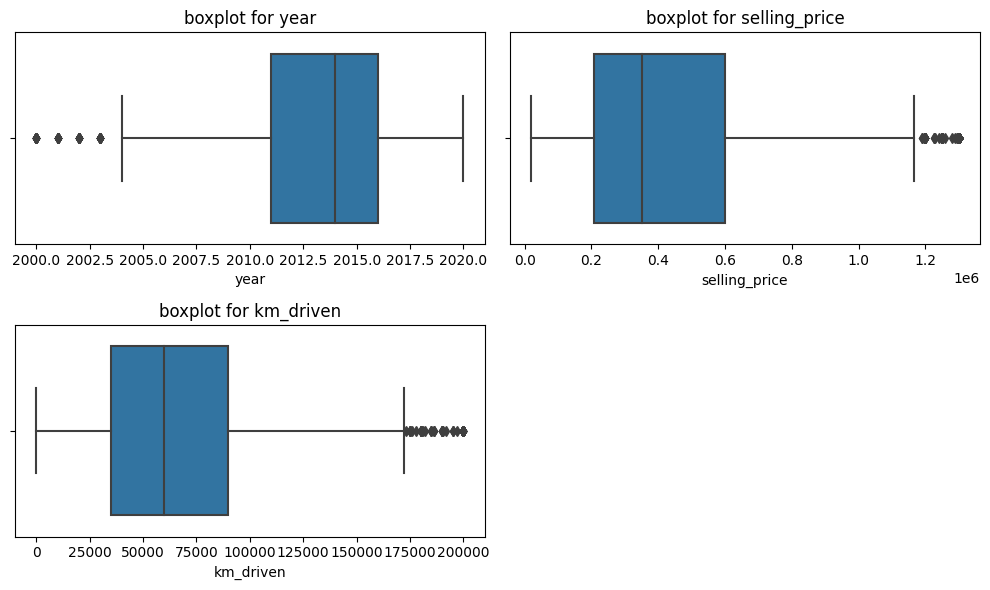

In [15]:
cols=['year', 'selling_price', 'km_driven']
plt.figure(figsize=(10,6))
for i in range(len(cols)):
    
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f"boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

In [ ]:
###Encoding categorical featrue

In [16]:
df_dum=pd.get_dummies(data=df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(4340, 1504)
Index(['year', 'selling_price', 'km_driven',
       'name_Ambassador Classic 2000 Dsz',
       'name_Ambassador Grand 1800 ISZ MPFI PW CL', 'name_Audi A4 1.8 TFSI',
       'name_Audi A4 2.0 TDI', 'name_Audi A4 2.0 TDI 177 Bhp Premium Plus',
       'name_Audi A4 3.0 TDI Quattro', 'name_Audi A4 30 TFSI Technology',
       ...
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object', length=1504)


In [81]:
### Select X and Y

In [17]:
x=df_dum.drop('selling_price',axis=1)
y=df['selling_price']
print(x.shape)
print(y.shape)

(4340, 1503)
(4340,)


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3255, 1503)
(1085, 1503)
(3255,)
(1085,)


In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
def eval_model(model,x_train,y_train,x_test,y_test,mname):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    mae=mean_absolute_error(y_test,y_pred)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    res=pd.DataFrame({"Train_score": train_score,"Test_score":test_score,"MAE":mae,"MSE":mse,"RMSE":rmse},index=[mname])
    return res

In [22]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

In [23]:
lr=LinearRegression()
lr_res=eval_model(lr,x_train,y_train,x_test,y_test,'LR_Reg')
lr_res

,Train_score,Test_score,MAE,MSE,RMSE
LR_Reg,0.964161,-4.315888e+11,2.587763e+10,4.492620e+22,2.119580e+11


In [24]:
rid=Ridge(alpha=7)
rid_res=eval_model(rid,x_train,y_train,x_test,y_test,'Ridge_Reg')
rid_res

,Train_score,Test_score,MAE,MSE,RMSE
Ridge_Reg,0.774749,0.71498,124122.329219,2.966910e+10,172247.214513


In [25]:
las=Lasso(alpha=7)
las_res=eval_model(las,x_train,y_train,x_test,y_test,'Lasso_Reg')
las_res

,Train_score,Test_score,MAE,MSE,RMSE
Lasso_Reg,0.962652,0.805627,87296.297649,2.023326e+10,142243.677414


In [26]:
dt=DecisionTreeRegressor(max_depth=7,min_samples_split=42)
dt_res=eval_model(dt,x_train,y_train,x_test,y_test,'DT_Reg')
dt_res

,Train_score,Test_score,MAE,MSE,RMSE
DT_Reg,0.731397,0.646294,131803.107992,3.681897e+10,191882.694731


In [27]:
rf=RandomForestRegressor(n_estimators=15,max_depth=7,min_samples_split=22)
rf_res=eval_model(rf,x_train,y_train,x_test,y_test,'RF_Reg')
rf_res

,Train_score,Test_score,MAE,MSE,RMSE
RF_Reg,0.757993,0.684492,126675.004365,3.284272e+10,181225.60607


In [28]:
rf_base=RandomForestRegressor(n_estimators=15,max_depth=7,min_samples_split=22)
bag=BaggingRegressor(base_estimator=rf_base,max_samples=x_train.shape[0],max_features=x_train.shape[1])
bag_res=eval_model(bag,x_train,y_train,x_test,y_test,'Bag_Reg')
bag_res

C:\Users\urp20\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Train_score,Test_score,MAE,MSE,RMSE
Bag_Reg,0.744601,0.681608,126328.731034,3.314302e+10,182052.254003


In [29]:
ada=AdaBoostRegressor(n_estimators=15,random_state=22)
ada_res=eval_model(ada,x_train,y_train,x_test,y_test,'Ada_Reg')
ada_res


,Train_score,Test_score,MAE,MSE,RMSE
Ada_Reg,0.581746,0.578272,171284.435791,4.389968e+10,209522.508893


In [30]:
knn=KNeighborsRegressor(n_neighbors=15)
knn_res=eval_model(knn,x_train,y_train,x_test,y_test,'knn')
knn_res

,Train_score,Test_score,MAE,MSE,RMSE
knn,0.479752,0.348904,185067.036559,6.777577e+10,260337.799223


In [32]:
all_join=pd.concat([lr_res,rid_res,las_res,dt_res,rf_res,bag_res,ada_res,knn_res])
all_join

,Train_score,Test_score,MAE,MSE,RMSE
LR_Reg,0.964161,-4.315888e+11,2.587763e+10,4.492620e+22,2.119580e+11
Ridge_Reg,0.774749,7.149802e-01,1.241223e+05,2.966910e+10,1.722472e+05
Lasso_Reg,0.962652,8.056267e-01,8.729630e+04,2.023326e+10,1.422437e+05
DT_Reg,0.731397,6.462942e-01,1.318031e+05,3.681897e+10,1.918827e+05
RF_Reg,0.757993,6.844925e-01,1.266750e+05,3.284272e+10,1.812256e+05
Bag_Reg,0.744601,6.816076e-01,1.263287e+05,3.314302e+10,1.820523e+05
Ada_Reg,0.581746,5.782725e-01,1.712844e+05,4.389968e+10,2.095225e+05
knn,0.479752,3.489040e-01,1.850670e+05,6.777577e+10,2.603378e+05


In [62]:
###inferance

# 1) Best_model with minimum Rmse:Lasso
# 2) Best_model with maximum Test score:Lasso
# 3) Best_model with minimal overfitting:Bag



In [37]:
import pickle

In [64]:
pickle.dump(lr,open("Linear_reg model.pkl","wb"))
pickle.dump(rid,open("Ridge_reg model.pkl","wb"))
pickle.dump(las,open("Lasso_reg model.pkl","wb"))
pickle.dump(rf,open("RandomForest_reg model.pkl","wb"))
pickle.dump(bag,open("Bagging_reg model.pkl","wb"))

In [33]:
df_dum.head()

,year,selling_price,km_driven,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,...,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
1,2007,135000,50000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
2,2012,600000,100000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
3,2017,250000,46000,False,False,False,False,False,False,False,...,False,False,True,True,False,True,False,False,False,False
4,2014,450000,141000,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False


In [40]:
df_dum.columns

Index(['year', 'selling_price', 'km_driven',
       'name_Ambassador Classic 2000 Dsz',
       'name_Ambassador Grand 1800 ISZ MPFI PW CL', 'name_Audi A4 1.8 TFSI',
       'name_Audi A4 2.0 TDI', 'name_Audi A4 2.0 TDI 177 Bhp Premium Plus',
       'name_Audi A4 3.0 TDI Quattro', 'name_Audi A4 30 TFSI Technology',
       ...
       'fuel_Electric', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object', length=1504)

In [43]:
df_dum['year'].value_counts()

year
2017    346
2012    338
2015    332
2014    321
2013    298
2018    295
2016    283
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2000     37
2003     22
2002     18
2001     16
Name: count, dtype: int64

In [44]:
df_dum['selling_price'].value_counts()

selling_price
1300000    148
300000     137
250000     112
350000     106
500000      87
          ... 
828999       1
1119000      1
746000       1
811999       1
865000       1
Name: count, Length: 373, dtype: int64

In [45]:
df_dum['km_driven'].value_counts()

km_driven
70000     210
120000    199
80000     199
60000     194
50000     181
         ... 
21394       1
32686       1
53261       1
39895       1
112198      1
Name: count, Length: 734, dtype: int64

In [47]:
df['fuel'].value_counts()

fuel
Diesel      1800
Petrol      1717
CNG           37
LPG           22
Electric       1
Name: count, dtype: int64